# bert

In [0]:
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

In [0]:
!unzip multi_cased_L-12_H-768_A-12.zip

In [0]:
import pandas

In [0]:
df = pandas.read_csv('/content/drive/My Drive/amazon.csv')

In [0]:
df =df[['label','text']]

In [0]:
max_seq_length = 220

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [0]:
test.to_csv("data_test.csv",header=False,index=False)

In [0]:
train.to_csv("data.csv",header=False,index=False)

In [0]:
pip install bert-for-tf2

In [0]:
pip install sentencepiece

     |████████████████████████████████| 1.0MB 9.4MB/s 


In [0]:
import bert
import os

def createTokenizer():
    currentDir = '/content/'
    modelsFolder = os.path.join(currentDir, "multi_cased_L-12_H-768_A-12")
    vocab_file = os.path.join(modelsFolder, "vocab.txt")

    tokenizer =bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case=True)
    return tokenizer

tokenizer = createTokenizer()

In [0]:
import csv
import os
import random
import numpy as np
classes = 2

fileName = os.path.join('/content/',"data.csv")
fileTestName = os.path.join('/content/', "data_test.csv")

data = []
data_test = []
train_set = []
train_labels = []
test_set = []
test_labels = []

with open(fileName, encoding='utf-8') as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=",")
    line_count = 0
    for row in csv_reader:
        if line_count > 0:
            data.append(row) 
        line_count +=1
csvFile.close()

with open(fileTestName, encoding='utf-8') as csvFileTest:
    csv_reader_test = csv.reader(csvFileTest, delimiter=",")
    line_count = 0
    for row in csv_reader_test:
        if line_count > 0:
            data_test.append(row)
        line_count +=1
csvFileTest.close()

shuffled_set = random.sample(data, len(data))
training_set = shuffled_set[0:]
shuffled_set_test = random.sample(data_test, len(data_test))
testing_set = shuffled_set_test[0:]

for el in training_set:
    train_set.append(el[1])
    zeros = [0] * classes
    zeros[int(el[0]) - 1] = 1
    train_labels.append(zeros)

for el in testing_set:
    test_set.append(el[1])
    zeros = [0] * classes
    zeros[int(el[0]) - 1] = 1
    test_labels.append(zeros)




In [0]:
train_tokens = map(tokenizer.tokenize, train_set)
train_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], train_tokens)
train_token_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))

In [0]:
train_token_ids = map(lambda tids: tids + [0] * (max_seq_length - len(tids)), train_token_ids)
train_token_ids = np.array(list(train_token_ids))

In [0]:
test_tokens = map(tokenizer.tokenize, test_set)
test_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], test_tokens)
test_token_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))

test_token_ids = map(lambda tids: tids + [0] * (max_seq_length - len(tids)), test_token_ids)
test_token_ids = np.array(list(test_token_ids))

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)


train_set, train_labels, test_set, test_labels = train_token_ids, train_labels_final, test_token_ids, test_labels_final

In [0]:
modelBertDir = '/content'

In [0]:
import bert
import os



bertDir = os.path.join(modelBertDir, "multi_cased_L-12_H-768_A-12")

bert_params = bert.params_from_pretrained_ckpt(bertDir)

bert_layer = bert.BertModelLayer.from_params(bert_params, name="bert")

bert_layer.apply_adapter_freeze()


modelsFolder = os.path.join(modelBertDir, "multi_cased_L-12_H-768_A-12")
checkpointName = os.path.join(modelsFolder, "bert_model.ckpt")



In [0]:
bert_layer = bert.BertModelLayer.from_params(bert_params, name="bert")

In [0]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_seq_length,), dtype='int32', name='input_ids'),
    bert_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes, activation=tf.nn.softmax)
])

model.build(input_shape=(None, max_seq_length))

model.compile(loss='categorical_crossentropy', optimizer=tf.compat.v2.optimizers.Adam(lr=0.00001), metrics=['accuracy'])

print(model.summary())

In [0]:
bert.load_stock_weights(bert_layer, checkpointName)

In [0]:
def fitModel(training_set, training_label, testing_set, testing_label):
    checkpointName = os.path.join('/content', "bert_faq.ckpt")

    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpointName,
                                                     save_weights_only=True,
                                                     verbose=1)

    # callback = StopTrainingClassComplete()

    history = model.fit(
        [training_set],
        training_label,
        epochs=300,
        validation_data=([testing_set], testing_label),
        verbose=1,
        callbacks=[cp_callback]
    )

In [0]:
fitModel(train_set, train_labels, test_set, test_labels)

In [0]:
tss = train_set[0][0]

In [0]:
tss

101

In [0]:
np.reshape(train_sett,(-1,))

In [0]:
train_set.shape

(143999,)

In [0]:
143999

In [0]:
train_sett = train_set.reshape((143999,-1),order='C')


In [0]:
train_sett = None
train_sett = [i for i in train_set]
  

In [0]:
train_sett

# attention scratch

In [0]:
https://towardsdatascience.com/learning-attention-mechanism-from-scratch-f08706aaf6b6

In [0]:
dec_hidden_state = [5,1,20]

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

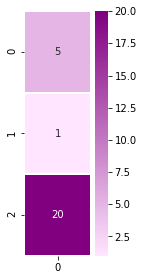

In [0]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)

In [0]:
annotation = [3,12,45] #e.g. Encoder hidden state

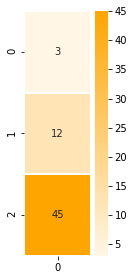

In [0]:
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(annotation)), annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def single_dot_attention_score(dec_hidden_state, enc_hidden_state):
 #return the dot product of the two vectors
 return np.dot(dec_hidden_state, enc_hidden_state)
 
single_dot_attention_score(dec_hidden_state, annotation)

927

In [0]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])

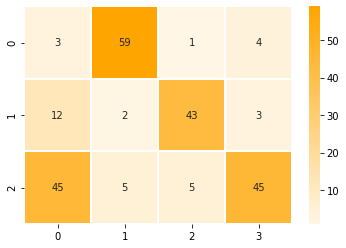

In [0]:
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

In [0]:
def dot_attention_score(dec_hidden_state, annotations):
 # return the product of dec_hidden_state transpose and enc_hidden_states
 return np.matmul(np.transpose(dec_hidden_state), annotations)
 
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

In [0]:
e_x = np.exp(np.array(attention_weights_raw, dtype=np.float128))

In [0]:
def softmax(x):
 x = np.array(x, dtype=np.float128)
 e_x = np.exp(x)
 return e_x / e_x.sum(axis=0)
attention_weights = softmax(attention_weights_raw)
attention_weights

array([1.19202922e-001, 7.94715151e-232, 5.76614420e-340, 8.80797078e-001],
      dtype=float128)

In [0]:
def apply_attention_scores(attention_weights, annotations):
 # Multiple the annotations by their weights
 return attention_weights * annotations
applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[3.57608766e-001, 4.68881939e-230, 5.76614420e-340,
        3.52318831e+000],
       [1.43043506e+000, 1.58943030e-231, 2.47944200e-338,
        2.64239123e+000],
       [5.36413149e+000, 3.97357575e-231, 2.88307210e-339,
        3.99001076e+001]], dtype=float128)

In [0]:
np.array(applied_attention,dtype=np.float16)

array([[ 0.3577,  0.    ,  0.    ,  3.523 ],
       [ 1.431 ,  0.    ,  0.    ,  2.643 ],
       [ 5.363 ,  0.    ,  0.    , 39.9   ]], dtype=float16)

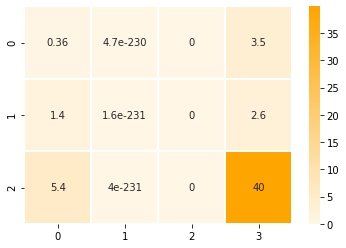

In [0]:
# Let’s visualize our annotations after applying attention to them
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

[ 3.88079708  4.0728263  45.26423912]


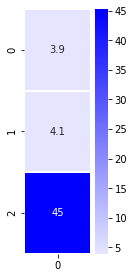

In [0]:
def calculate_attention_vector(applied_attention):
 return np.sum(applied_attention, axis=1)
attention_vector = calculate_attention_vector(applied_attention)
print(attention_vector)
# Let’s visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)

# q & a

In [0]:
import re
import tarfile
import numpy as np
from functools import reduce
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
try:
    #tar.gz data-set get saved on "~/.keras/datasets/" path
    path = get_file('babi-tasks-v1-2.tar.gz', origin='https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz')
except:
    print('Error downloading dataset, please download it manually:\n'
          '$ wget http://www.thespermwhale.com/jaseweston/babi/tasks_1-20_v1-2.tar.gz\n'
          '$ mv tasks_1-20_v1-2.tar.gz ~/.keras/datasets/babi-tasks-v1-2.tar.gz')
    raise
 
#reading a tar.gz file
tar = tarfile.open(path)

11747328/11745123 [==============================] - 1s 0us/step


In [0]:
def tokenize(sent):
    '''
    argument: a sentence string
    returns a list of tokens(words)
    '''
    return [ x.strip() for x in re.split('(\W+)?', sent) if x.strip()]

In [0]:
def parse_stories(lines):
    '''
    - Parse stories provided in the bAbI tasks format
    - A story starts from line 1 to line 15. Every 3rd line,
      there is a question &amp;amp;amp;amp;amp; answer.
    - Function extracts sub-stories within a story and
      creates tuples
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        nid = int(nid)
        if nid == 1:
            # reset story when line ID=1 (start of new story)
            story = []
        if '\t' in line:
            # this line is tab separated Q, A &amp;amp;amp;amp;amp; support fact ID
            q, a, supporting = line.split('\t')
            # tokenize the words of question
            q = tokenize(q)
            # Provide all the sub-stories till this question
            substory = [x for x in story if x]
            # A story ends and is appended to global story data-set
            data.append((substory, q, a))
            story.append('')
        else:
            # this line is a sentence of story
            sent = tokenize(line)
            story.append(sent)
    return data

In [0]:
def get_stories(f):
    '''
    argument: filename
    returns list of all stories in the argument data-set file
    '''

    # read the data file and parse 10k stories
    data = parse_stories(f.readlines())
    print(data[0])
    # lambda func to flatten the list of sentences into one list
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    # creating list of tuples for each story
    data = [(flatten(story), q, answer) for story, q, answer in data]
    return data

In [0]:
challenge = 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt'
print('Extracting stories for the challenge: single_supporting_fact_10k')
# Extracting train stories
train_stories = get_stories(tar.extractfile(challenge.format('train')))
# Extracting test stories
test_stories = get_stories(tar.extractfile(challenge.format('test')))

Extracting stories for the challenge: single_supporting_fact_10k


/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


([['Mary', 'moved', 'to', 'the', 'bathroom', '.'], ['John', 'went', 'to', 'the', 'hallway', '.']], ['Where', 'is', 'Mary', '?'], 'bathroom')
([['John', 'travelled', 'to', 'the', 'hallway', '.'], ['Mary', 'journeyed', 'to', 'the', 'bathroom', '.']], ['Where', 'is', 'John', '?'], 'hallway')


In [0]:
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
train_stories[0]

Number of training stories: 10000
Number of test stories: 1000


(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'John',
  'went',
  'to',
  'the',
  'hallway',
  '.'],
 ['Where', 'is', 'Mary', '?'],
 'bathroom')

In [0]:
def vectorize_stories(data, word_idx, story_maxlen, query_maxlen):
    # story vector initialization
    X = []
    # query vector initialization
    Xq = []
    # answer vector intialization
    Y = []
    for story, query, answer in data:
        # creating list of story word indices
        x = [word_idx[w] for w in story]
        # creating list of query word indices
        xq = [word_idx[w] for w in query]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        # creating label 1 for the answer word index
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=query_maxlen), np.array(Y))

In [0]:
# creating vocabulary of words in train and test set
vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
 
# sorting the vocabulary
vocab = sorted(vocab)
 
# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1

In [0]:

 
# calculate maximum length of story
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
 
# calculate maximum length of question/query
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))
 
# creating word to index dictionary
word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
 
# creating index to word dictionary
idx_word = dict((i+1, c) for i,c in enumerate(vocab))
 


In [0]:
# vectorize train story, query and answer sentences/word using vocab
inputs_train, queries_train, answers_train = vectorize_stories(train_stories,
                                                               word_idx,
                                                               story_maxlen,
                                                               query_maxlen)
# vectorize test story, query and answer sentences/word using vocab
inputs_test, queries_test, answers_test = vectorize_stories(test_stories,
                                                            word_idx,
                                                            story_maxlen,
                                                            query_maxlen)

In [0]:
print('-------------------------')
print('Vocabulary:\n',vocab,"\n")
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-------------------------')

-------------------------
Vocabulary:
 ['.', '?', 'Daniel', 'John', 'Mary', 'Sandra', 'Where', 'back', 'bathroom', 'bedroom', 'garden', 'hallway', 'is', 'journeyed', 'kitchen', 'moved', 'office', 'the', 'to', 'travelled', 'went'] 

Vocab size: 22 unique words
Story max length: 68 words
Query max length: 4 words
Number of training stories: 10000
Number of test stories: 1000
-------------------------


In [0]:
print('-------------------------')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('input train sample', inputs_train[0,:])
print('-------------------------')

-------------------------
inputs: integer tensor of shape (samples, max_length)
inputs_train shape: (10000, 68)
inputs_test shape: (1000, 68)
input train sample [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  5 16 19 18  9  1  4 21 19 18 12  1]
-------------------------


In [0]:
import IPython
import matplotlib.pyplot as plt
import pandas as pd
 
import keras
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Permute, dot, add, concatenate
from keras.layers import LSTM, Dense, Dropout, Input, Activation

In [0]:
# number of epochs to run
train_epochs = 100
# Training batch size
batch_size = 32
# Hidden embedding size
embed_size = 50
# number of nodes in LSTM layer
lstm_size = 64
# dropout rate
dropout_rate = 0.30

In [0]:
# placeholders
input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))
 
print('Input sequence:', input_sequence)
print('Question:', question)



Input sequence: Tensor("input_1:0", shape=(?, 68), dtype=float32)
Question: Tensor("input_2:0", shape=(?, 4), dtype=float32)


In [0]:
# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=embed_size))
input_encoder_m.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, embedding_dim)
 
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, query_maxlen)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=embed_size,
                               input_length=query_maxlen))
question_encoder.add(Dropout(dropout_rate))
# output: (samples, query_maxlen, embedding_dim)

In [0]:
 # encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
print('Input encoded m', input_encoded_m)
input_encoded_c = input_encoder_c(input_sequence)
print('Input encoded c', input_encoded_c)
question_encoded = question_encoder(question)
print('Question encoded', question_encoded)

Input encoded m Tensor("sequential_1/dropout_1/cond/Merge:0", shape=(?, 68, 50), dtype=float32)
Input encoded c Tensor("sequential_2/dropout_2/cond/Merge:0", shape=(?, 68, 4), dtype=float32)
Question encoded Tensor("sequential_3/dropout_3/cond/Merge:0", shape=(?, 4, 50), dtype=float32)


In [0]:
# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)
match = dot([input_encoded_m, question_encoded], axes=-1, normalize=False)
print(match.shape)
match = Activation('softmax')(match)
print('Match shape', match)

(?, 68, 4)
Match shape Tensor("activation_1/truediv:0", shape=(?, 68, 4), dtype=float32)


In [0]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)
print('Response shape', response)
 
# concatenate the response vector with the question vector sequence
answer = concatenate([response, question_encoded])
print('Answer shape', answer)
 
answer = LSTM(lstm_size)(answer)  # Generate tensors of shape 32
answer = Dropout(dropout_rate)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

Response shape Tensor("permute_1/transpose:0", shape=(?, 4, 68), dtype=float32)
Answer shape Tensor("concatenate_1/concat:0", shape=(?, 4, 118), dtype=float32)


In [0]:
class TrainingVisualizer(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super().on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('loss')}).plot()
        axes = pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('acc')}).plot()
        axes.set_ylim([0, 1])
        plt.show()

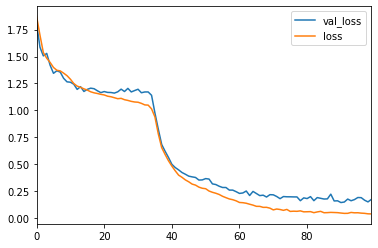

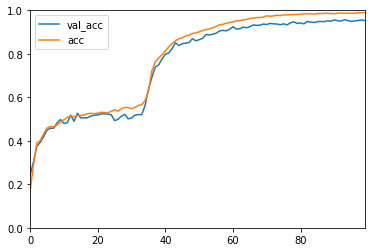

In [0]:
# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
 
print(model.summary())
 
# start training the model
model.fit([inputs_train, queries_train],
         answers_train, batch_size, train_epochs,
         callbacks=[TrainingVisualizer()],
         validation_data=([inputs_test, queries_test], answers_test))
 
# save model
model.save('model.h5')

In [0]:
for i in range(50,60):
    current_inp = test_stories[i]
    current_story, current_query, current_answer = vectorize_stories([current_inp], word_idx, story_maxlen, query_maxlen)
    current_prediction = model.predict([current_story, current_query])
    current_prediction = idx_word[np.argmax(current_prediction)]
    print(' '.join(current_inp[0]), ' '.join(current_inp[1]), '| Prediction:', current_prediction, '| Ground Truth:', current_inp[2])
    print("--------------------------------------------------------------")

John journeyed to the hallway . John journeyed to the bedroom . Where is John ? | Prediction: bedroom | Ground Truth: bedroom
--------------------------------------------------------------
John journeyed to the hallway . John journeyed to the bedroom . Daniel journeyed to the bedroom . John journeyed to the office . Where is John ? | Prediction: office | Ground Truth: office
--------------------------------------------------------------
John journeyed to the hallway . John journeyed to the bedroom . Daniel journeyed to the bedroom . John journeyed to the office . John moved to the garden . Daniel moved to the garden . Where is John ? | Prediction: garden | Ground Truth: garden
--------------------------------------------------------------
John journeyed to the hallway . John journeyed to the bedroom . Daniel journeyed to the bedroom . John journeyed to the office . John moved to the garden . Daniel moved to the garden . Daniel went back to the kitchen . Mary journeyed to the hallway . 

#  VAE

In [0]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [0]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2

In [0]:
input_img = keras.Input(shape=img_shape)
x = layers.Conv2D(32, 3,padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [0]:
def sampling(args):
  z_mean, z_log_var = args
  epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),mean=0., stddev=1.)
  return z_mean + K.exp(z_log_var) * epsilon
z = layers.Lambda(sampling)([z_mean, z_log_var])

In [0]:
decoder_input = layers.Input(K.int_shape(z)[1:])
x = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,padding='same',activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same',activation='sigmoid')(x)

In [0]:
decoder = Model(decoder_input, x)
z_decoded = decoder(z)

In [0]:
class CustomVariationalLayer(keras.layers.Layer):
  def vae_loss(self, x, z_decoded):
    x = K.flatten(x)
    z_decoded = K.flatten(z_decoded)
    xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
    kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)
  def call(self, inputs):
    x = inputs[0]
    z_decoded = inputs[1]
    loss = self.vae_loss(x, z_decoded)
    self.add_loss(loss, inputs=inputs)
    return x
y = CustomVariationalLayer()([input_img, z_decoded])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.datasets import mnist
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()


In [0]:
x_train[0]

In [0]:
mkdir my_log_dir

In [0]:
(x_train, _), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))
callbacks = [
keras.callbacks.TensorBoard(log_dir='my_log_dir')
]
vae.fit(x=x_train, y=None,
  shuffle=True,
  epochs=10,
  batch_size=batch_size,
  validation_data=(x_test, None),callbacks=callbacks)

In [0]:
import tensorflow as tf

def make_image(tensor):
    """
    Convert an numpy representation image to Image protobuf.
    Copied from https://github.com/lanpa/tensorboard-pytorch/
    """
    from PIL import Image
    height, width= tensor.shape
    channel = 3
    tensor *= 255
    image = Image.fromarray(tensor).convert('RGB')
    import io
    output = io.BytesIO()
    image.save(output, format='PNG')
    image_string = output.getvalue()
    output.close()
    return tf.Summary.Image(height=height,
                         width=width,
                         colorspace=channel,
                         encoded_image_string=image_string)


import matplotlib.pyplot as plt
from scipy.stats import norm
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
writer = tf.summary.FileWriter('./logs')
for i, yi in enumerate(grid_x):
  for j, xi in enumerate(grid_y):
    z_sample = np.array([[xi, yi]])
    z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
    x_decoded = decoder.predict(z_sample, batch_size=batch_size)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    image = make_image(digit)
    summary = tf.Summary(value=[tf.Summary.Value(tag='Image Example', image=image)])
    figure[i * digit_size: (i + 1) * digit_size,j * digit_size: (j + 1) * digit_size] = digit
    writer.add_summary(summary, 10)
writer.close()
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()    

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir /content/logs

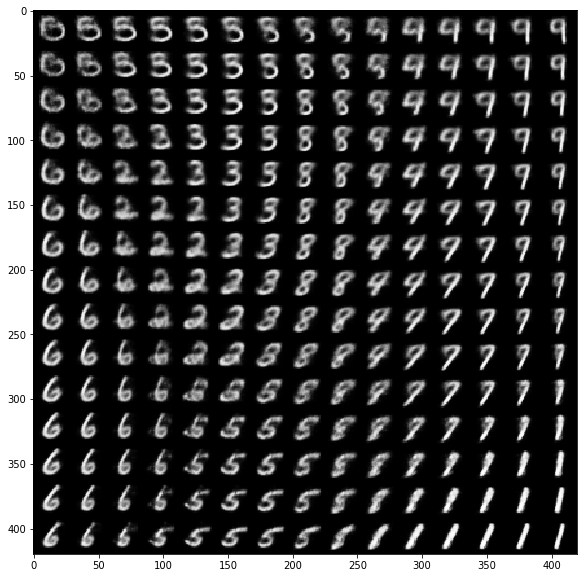

In [0]:
import matplotlib.pyplot as plt
from scipy.stats import norm
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
for i, yi in enumerate(grid_x):
  for j, xi in enumerate(grid_y):
    z_sample = np.array([[xi, yi]])
    z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
    x_decoded = decoder.predict(z_sample, batch_size=batch_size)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    figure[i * digit_size: (i + 1) * digit_size,j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

# GAN

In [0]:
import keras
from keras import layers
import numpy as np
latent_dim = 32
height = 32
width = 32
channels = 3

In [0]:
generator_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32768)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 256)       1048

In [0]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()
discriminator_optimizer = keras.optimizers.RMSprop(
 lr=0.0008,
 clipvalue=1.0,
 decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer,
loss='binary_crossentropy')

In [0]:
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [0]:
import os
from keras.preprocessing import image
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

In [0]:
x_train = x_train[y_train.flatten() == 6]
x_train = x_train.reshape((x_train.shape[0],) +(height, width, channels)).astype('float32') / 255.
iterations = 10000
batch_size = 20
save_dir = '/content/'
start = 0
for step in range(iterations):
  random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
  generated_images = generator.predict(random_latent_vectors)
  stop = start + batch_size
  real_images = x_train[start: stop]
  combined_images = np.concatenate([generated_images, real_images])
  labels = np.concatenate([np.ones((batch_size, 1)),np.zeros((batch_size, 1))])
  labels += 0.05 * np.random.random(labels.shape)
  d_loss = discriminator.train_on_batch(combined_images, labels)
  random_latent_vectors = np.random.normal(size=(batch_size,latent_dim))
  misleading_targets = np.zeros((batch_size, 1))
  a_loss = gan.train_on_batch(random_latent_vectors,misleading_targets)
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0
  if step % 100 == 0:
    gan.save_weights('gan.h5')
    print('discriminator loss:', d_loss)
    print('adversarial loss:', a_loss)
    img = image.array_to_img(generated_images[0] * 255., scale=False)
    img.save(os.path.join(save_dir,'generated_frog' + str(step) + '.png'))
    img = image.array_to_img(real_images[0] * 255., scale=False)
    img.save(os.path.join(save_dir,'real_frog' + str(step) + '.png'))

In [0]:
import os
filelist=os.listdir()

KeyboardInterrupt: ignored

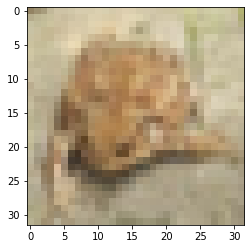

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time

%matplotlib inline


for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if (fichier.endswith(".png")):
      p = fichier
      #print p
      image = mpimg.imread(p) # images are color images
      plt.gca().clear()
      plt.imshow(image);
      display.display(plt.gcf())
      display.clear_output(wait=True)
      time.sleep(1.0) # wait one second

# another